In [1]:
%matplotlib inline

import cv2
import numpy as np

In [6]:
from skimage.exposure import rescale_intensity
def convolve (image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    
    pad = int((kW-1) / 2)
    
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, 
                               cv2.BORDER_REPLICATE)
    output = np.zeros ((iH, iW), dtype="float32")
    
    for y in np.arange (pad, iH+pad):
        for x in np.arange (pad, iW+pad):
            roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
            pixel = (roi*kernel).sum()
            output[y-pad, x-pad] = pixel
            
    output = rescale_intensity (output, in_range=(0, 255))
    output = (output*255).astype("uint8")
    return output

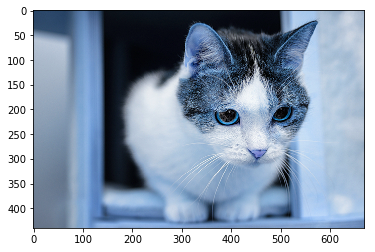

In [11]:
from matplotlib import pyplot as plt
image = cv2.imread ("cat.jpg")
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

large_blur = np.ones ((21, 21), dtype="float") * (1.0/(21*21))
large_blured_image = convolve (gray, large_blur)

sharpen = np.array ([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

sharpen_image = convolve (gray, sharpen)

plt.imshow (image)

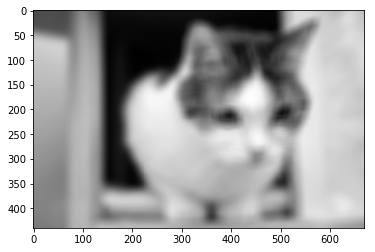

In [10]:
plt.imshow (large_blured_image, cmap="gray")

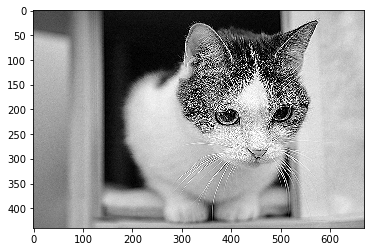

In [12]:
plt.imshow (sharpen_image, cmap="gray")